# WeFEND-AAAI20

## Setup and import libraries

In [1]:
# Automatically reloading imported modules
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.helpers import *

pd.set_option('display.max_columns', None)

In [3]:
# Change design of plots
sns.set(style="whitegrid")

# Change sizes and resolution of plots
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [4]:
df_train = pd.read_csv('data/train_news.csv')
df_test = pd.read_csv('data/test_news.csv')

df = pd.concat([df_train, df_test], ignore_index=True)

## General descriptive analysis

Let's check shape of the data - number of rows and attributes:

In [5]:
df.shape

(20728, 6)

Overview of the data:

In [6]:
df.head()

,Ofiicial Account Name,Title,News Url,Image Url,Report Content,label
0,环球人物,中国反腐风刮到阿根廷，这个美到让人瘫痪的女总统，因为8个本子摊上大事了,http://mp.weixin.qq.com/s?__biz=MTAzNDI4MDc2MQ...,http://mmbiz.qpic.cn/mmbiz_jpg/hpcO6kWnPm6cX3M...,内容不符,0
1,西湖之声,腾讯为《如懿传》道歉？这部3亿大剧上映第一天遭网友狂吐槽：愣是拍成村头恋曲...,http://mp.weixin.qq.com/s?__biz=MTA2Mjk0MTE2MA...,http://mmbiz.qpic.cn/mmbiz_jpg/vQCGoQzHAbaAXRr...,满口胡言,0
2,厦门晚报,顺风车司机奸杀20岁女乘客，落网视频曝光！滴滴道歉…,http://mp.weixin.qq.com/s?__biz=MTA3NzI1Mzg4MQ...,http://mmbiz.qpic.cn/mmbiz_jpg/TxqQX9BtmOMpwDZ...,？,0
3,腾讯娱乐,偶遇鹿晗关晓彤旅行过七夕，小情侣是真滴甜...,http://mp.weixin.qq.com/s?__biz=MTA5NTIzNDE2MQ...,http://mmbiz.qpic.cn/mmbiz_jpg/9Ju9PZ1NxhfkIZ3...,领个屁证，过你妹的七夕，几天前的图在今天拿来博眼球,0
4,腾讯娱乐,赵丽颖和冯绍峰即将公布恋情？网友：曝不曝没区别啊,http://mp.weixin.qq.com/s?__biz=MTA5NTIzNDE2MQ...,http://mmbiz.qpic.cn/mmbiz_jpg/9Ju9PZ1NxhdTkXb...,事件不实。,0


### Datatypes

**Note:** Be careful, attributes with only NaN values are considered as `float64` type by default.

In [7]:
df.dtypes

Ofiicial Account Name    object
Title                    object
News Url                 object
Image Url                object
Report Content           object
label                     int64
dtype: object

### Basic characteristics

In [8]:
df.describe()

,label
count,20728.000000
mean,0.203831
std,0.402854
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
df.describe(exclude=[np.number])

,Ofiicial Account Name,Title,News Url,Image Url,Report Content
count,20718,20728,20728,20728,20728
unique,7394,7567,9240,8874,7824
top,娱记说,41岁刘涛外遇选择离婚，她将何去何从，朋友圈震惊...,http://mp.weixin.qq.com/s?__biz=MzIxNDc0NzUyMw...,https://mmbiz.qlogo.cn/mmbiz_jpg/NyzYZ2lU2Xs4c...,标题党
freq,54,116,6,46,210


### One-value columns

Which attributes contain only one value?

In [10]:
one_value_attributes_analysis(df)

### Missing values

Analysis of missing values in attributes:

Ofiicial Account Name: 10 (0.05%)

Missing values plot (inverse logic, plot is showing how many values are not NaN):


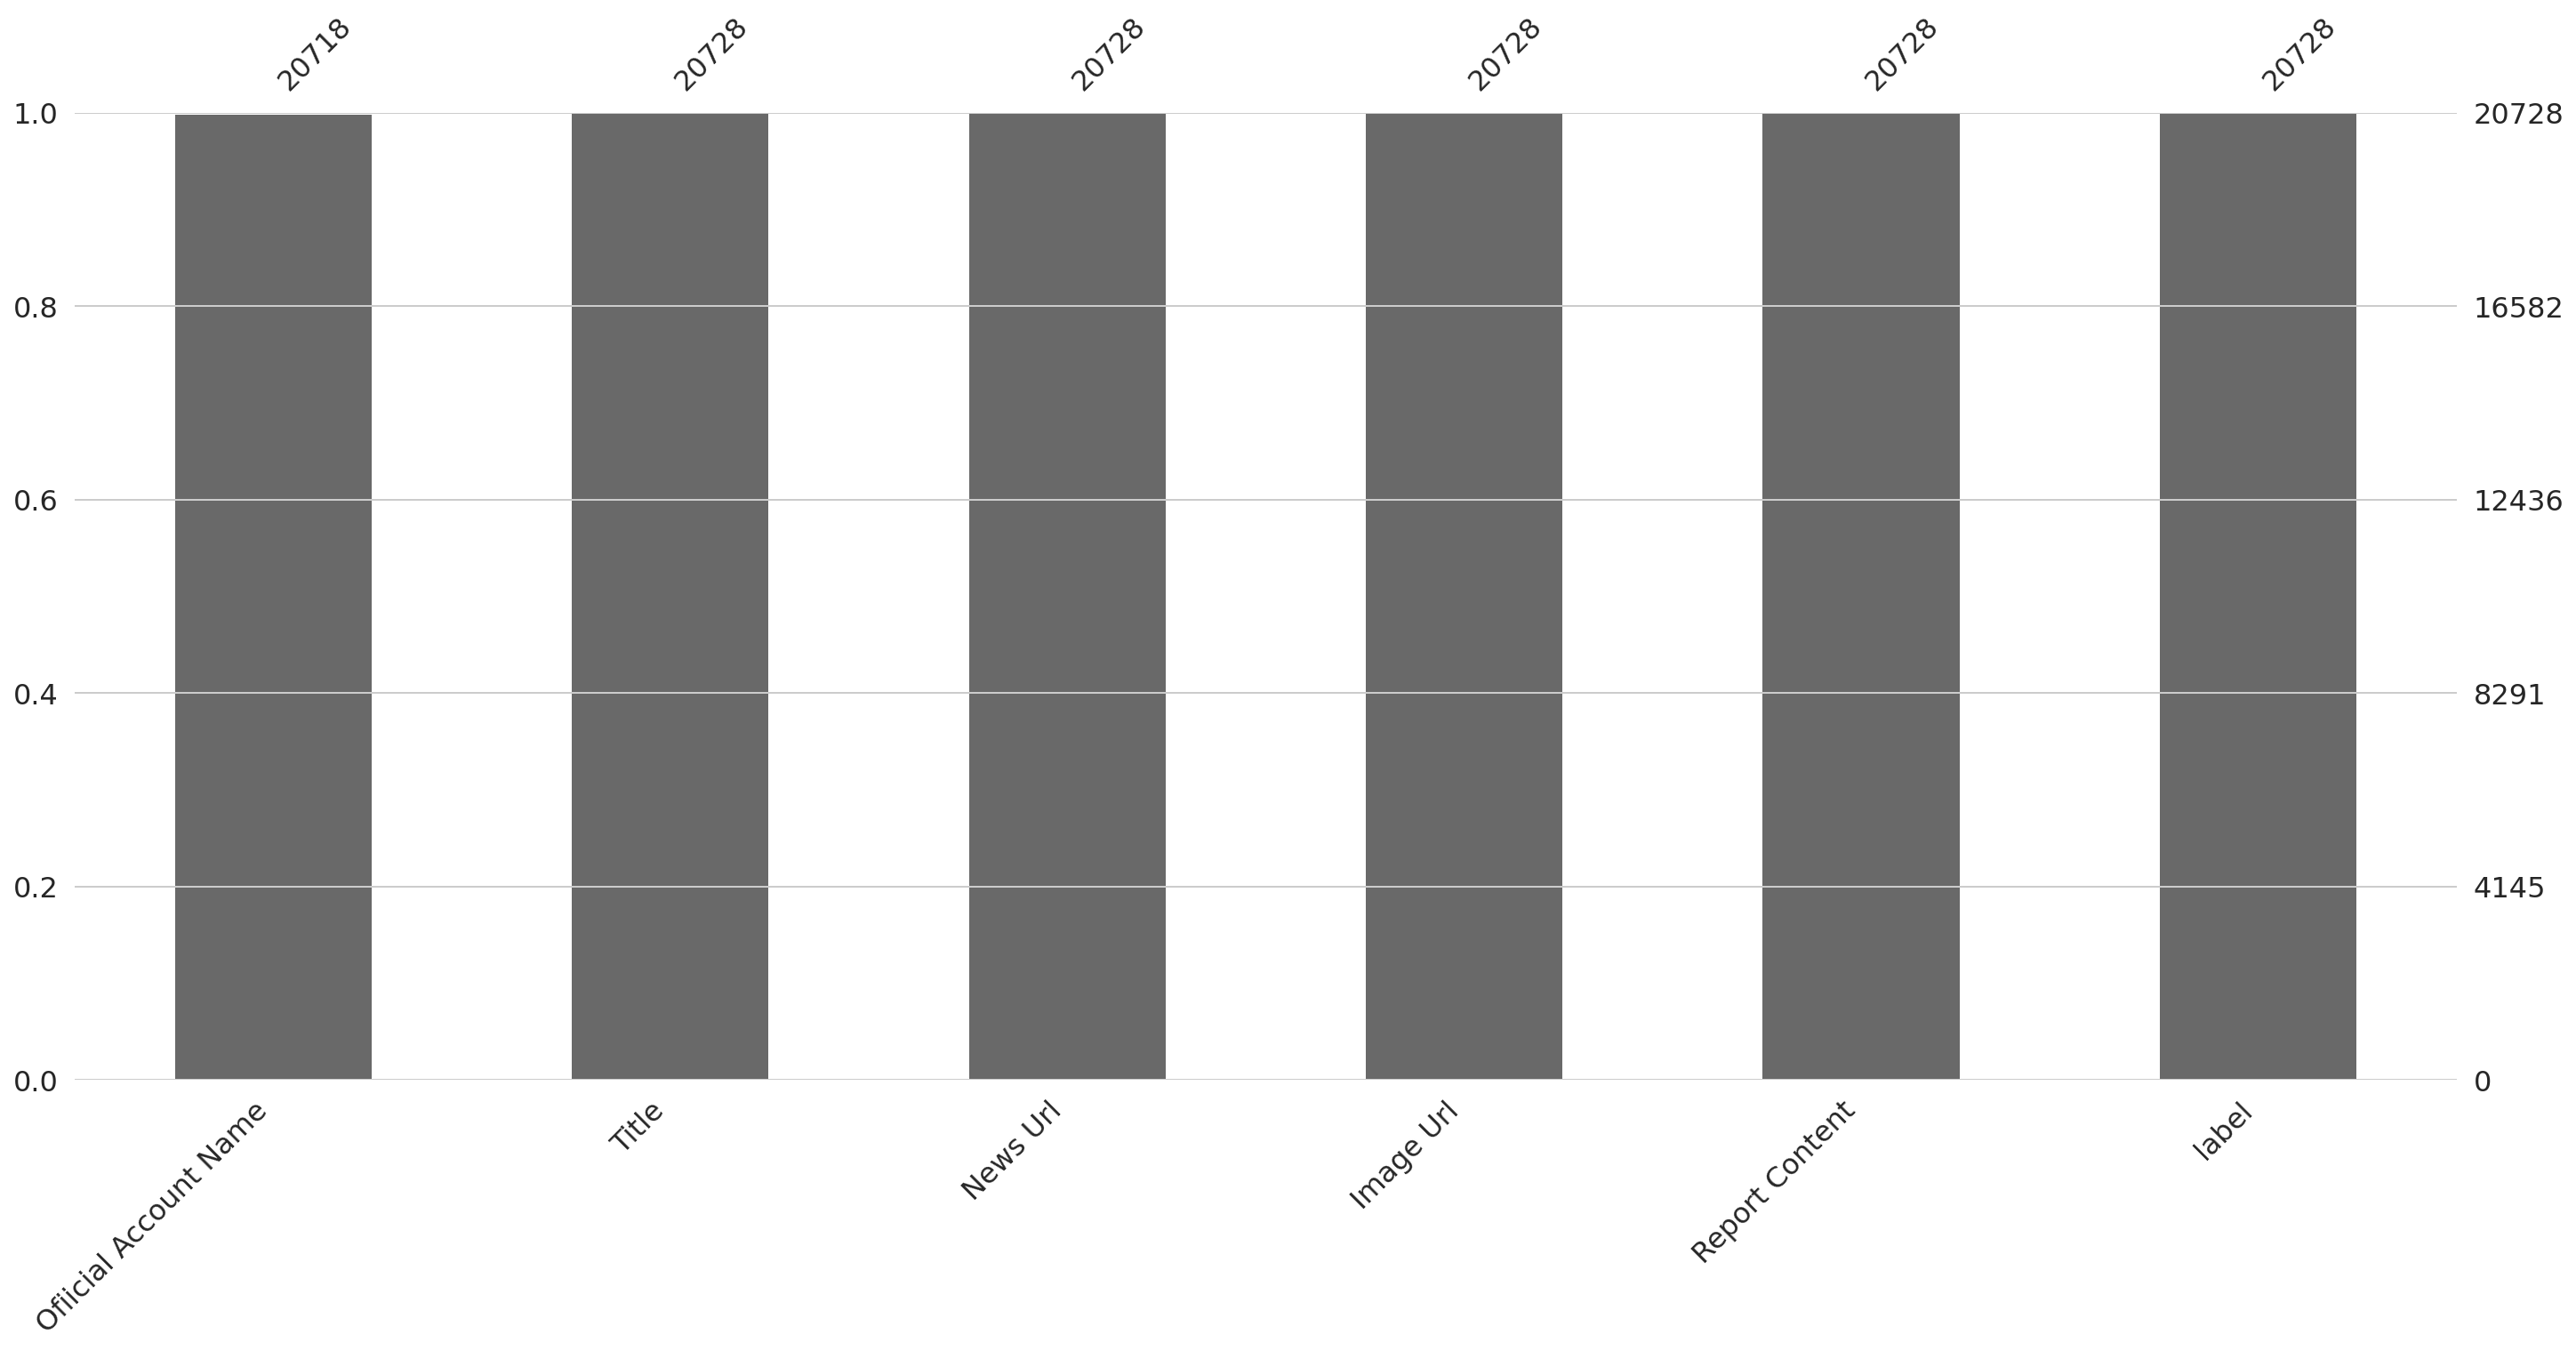

In [11]:
missing_values_analysis(df)

### Duplicates

Are there any duplicates?

In [12]:
df.duplicated().any()

True

## Attributes analysis

Analysis of all attributes:

In [13]:
skip_attributes = [
    'News Url', 'Image Url', 'Report Content', 'Ofiicial Account Name', 'Title'
] # attributes to skip in analysis (e.g. id)

textual_attributes = [
] # attributes with text values (e.g. content of article)
textual_attributes = list(filter(lambda value: value not in skip_attributes, textual_attributes))

numerical_attributes = list(df.select_dtypes([np.number]).columns)
numerical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, numerical_attributes))

categorical_attributes = list(df.select_dtypes(['object', 'category']).columns)
categorical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, categorical_attributes))

label_column = 'label' # attribute considered as "label"

### Label attribute distribution

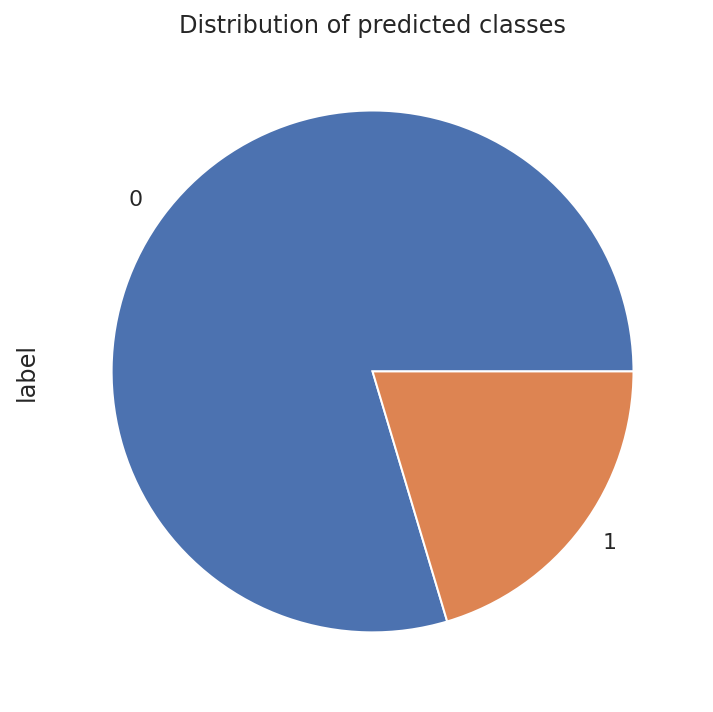

In [14]:
df[label_column].value_counts().plot(kind='pie', title='Distribution of predicted classes');

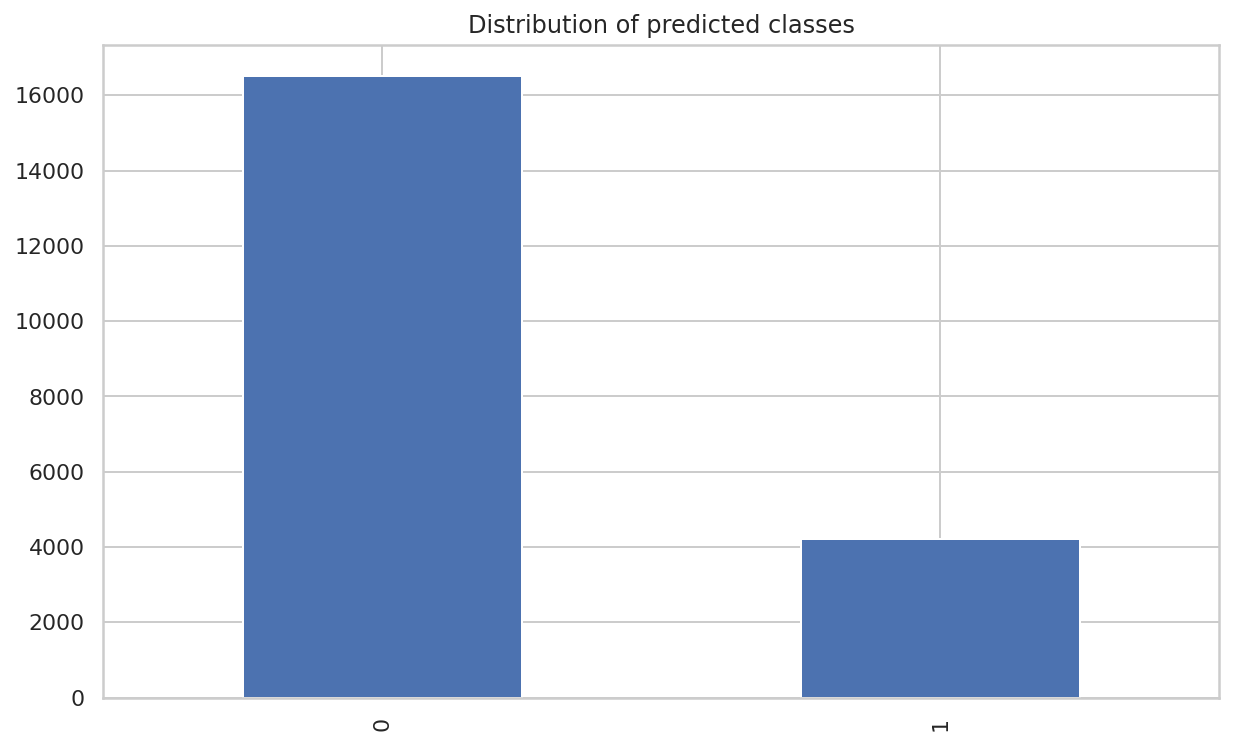

In [15]:
df[label_column].value_counts().plot(kind='bar', title='Distribution of predicted classes');

### Numerical attributes

Analysis of numerical attributes:

In [16]:
analyse_numerical_attributes(df, label_column, numerical_attributes)

There are no attributes to be analysed.


### Categorical attributes

Analysis of categorical attributes:

In [17]:
analyse_categorical_attributes(df, label_column, categorical_attributes)

There are no attributes to be analysed.


### Textual attributes

Some parts of analysis include preprocessing text. In this case, the following operations are performed:
* removing special characters (only letters are preserved),
* removing tokens shorter than 3 characters,
* removing tokens that are in english stop-words defined by NLTK library,
* removing accent marks from tokens.

Analysis of textual attributes:

In [18]:
analyse_textual_attributes(df, textual_attributes)

There are no attributes to be analysed.


## Pairwise analysis

Pairwise analysis of attributes (numerical attributes):

### Pair analysis

In [19]:
if numerical_attributes and len(numerical_attributes) > 1:
    sns.pairplot(df, vars=numerical_attributes, hue=label_column);

### Correlations

Correlation matrix:

In [20]:
if numerical_attributes and len(numerical_attributes) > 1:
    check_correlations(df, numerical_attributes)